# Отчет: задание 2

*Неверо Андрей, лабораторная работа 1, 2 курс, 4 группа*

В задании требовалось написать программу, которая может рассчитать TLU-разложение матрицы и с его помощью решить систему линейных уравнений, заданную в матричном виде (здесь под $T$ подразумевается матрица перестановок строк). Были заданы две системы, на которых требовалось протестировать программу.

Решением данной задачи можно считать реализацию методов *CountTluDecomposition*, *SolveSystem* и *CountInverseMatrix* класса Matrix (см. соответствующий заголовочный файл).

Обработка связанных с этим заданием входных данных вынесена в отдельный класс, определенный в заголовочном файле *Task2*.

## Пункт 1

Найденное первой системы выглядит следующим образом:

$$ X = \begin{bmatrix}
        1 \\
        2 \\
        3 \\
        4 \\
        5 \\
        6 \\
        7 \\
        8
\end{bmatrix} $$

Как видно, программе удалось получить точное решение. Хотя при его вычислении использовался типа *long double*, относительно небольшое число обусловленности заданной матрицы (70830) позволяло надеяться на получение более-менее точного результата и при использовании, например, 32-разрядного типа *float*. И действительно, *float* вызвал лишь небольшое возмущение первых двух координат итогового вектора. Вывод с точностью до 10 знаков после запятой:

$$ X = \begin{bmatrix}
        0.9999988675 \\
        1.9999991655 \\
        3.0000000000 \\
        4.0000000000 \\
        5.0000000000 \\
        6.0000000000 \\
        7.0000000000 \\
        8.0000000000
\end{bmatrix} $$

Впрочем, при возмущении вектора $B$ результаты определенно станут хуже. Немного подробнее это будет проанализировано в третьем пункте.

## Пункт 2

Найденное решение второй системы выглядит следующим образом:

$$ X = \begin{bmatrix}
        1 \\
        1 \\
        1 \\
        1 \\
        1 \\
        1 \\
        1 \\
        1 \\
        1
\end{bmatrix} $$

Как и в предыдущем пункте, при использовании типа *long double* программе удалось получить точное решение. Так как число обусловленности заданной матрицы очень велико ($6.39 \cdot 10^{10}$), логично предположить, что при переключении на 32-разрядный тип *float* точность результатов ухудшится. Так и есть. Результаты, полученные при использовании *float*, достаточно далеки от точных:

$$ X = \begin{bmatrix}
        90.6177062988 \\
        -237.6647949219 \\
        251.0213623047 \\
        -136.3011932373 \\
        44.8452186584 \\
        -7.4159960747 \\
        1.9551106691 \\
        0.9410537481 \\
        1.0015225410
\end{bmatrix} $$

Как отразится на точности решения возмущение вектора $B$?

## Пункт 3

Рассмотрим ту же матрицу $A$, что в пункте 2, но на этот раз будем случайным образом генерировать вещественные координаты вектора $B$. Будем проверять, насколько полученное решение $X$ точное, по норме вектора $B - AX$. В случае, если решение абсолютно точное, она должна быть равна нулю. Чем больше эта норма, тем больше погрешность.

Для каждого из трех стандартных типов вещественных чисел в C++ (*float*, *double*, *long double*) анализируются результаты работы программы на 250 тестах. Каждый тест - это:

1. Генерация вектора $B$ (модули его координат - случайные немного возмущенные числа от $1$ до $5000$).
2. Решение системы $AX = B$.
3. Подсчет нормы вектора $B - AX$.

Полученные результаты представлены ниже.

In [1]:
from data import task2
import matplotlib
%matplotlib inline

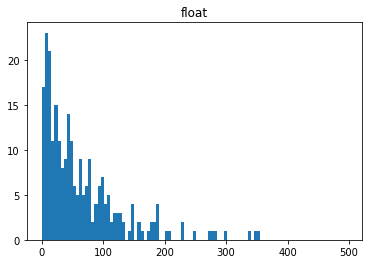

In [2]:
bins = [i for i in range(1, 500, 5)]
matplotlib.pyplot.title("float")
matplotlib.pyplot.hist(task2.float_fault, bins)
matplotlib.pyplot.show()

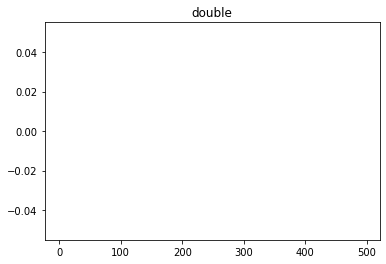

In [3]:
bins = [i for i in range(1, 500, 5)]
matplotlib.pyplot.title("double")
matplotlib.pyplot.hist(task2.double_fault, bins)
matplotlib.pyplot.show()

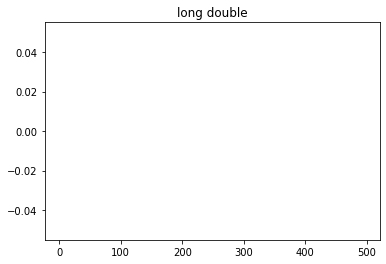

In [4]:
bins = [i for i in range(1, 500, 5)]
matplotlib.pyplot.title("long double")
matplotlib.pyplot.hist(task2.long_double_fault, bins)
matplotlib.pyplot.show()

Как видно, погрешности типов *double* и *long double* оказались на порядки меньше, чем погрешности *float* (настолько, что не отображаются на гистограмме такого масштаба). Сразу можно сделать вывод, что использовать *float* в подобных вычислениях не следует.

Приблизим гистограмму и рассмотрим различия между *double* и *long double*.

In [5]:
import numpy

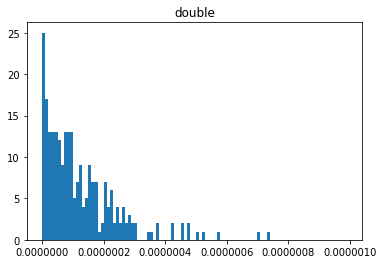

In [6]:
bins = [i for i in numpy.arange(0, 0.000001, 0.00000001)]
matplotlib.pyplot.title("double")
matplotlib.pyplot.hist(task2.double_fault, bins)
matplotlib.pyplot.show()

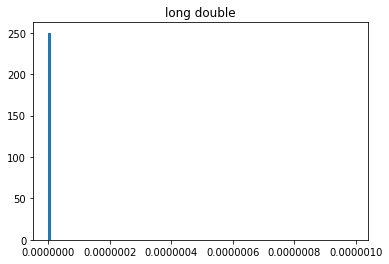

In [7]:
bins = [i for i in numpy.arange(0, 0.000001, 0.00000001)]
matplotlib.pyplot.title("long double")
matplotlib.pyplot.hist(task2.long_double_fault, bins)
matplotlib.pyplot.show()

Нетрудно заметить, что *double* начинает давать погрешности уже на шестом-седьмом знаке после точки, когда *long double* все еще выдает более-менее корректные результаты.

Окончательно получаем, что:
1. Использовать *float* при решении плохо обусловленных систем не следует: получаемые погрешности слишком велики.
2. Если хватает точности до нескольких знаков после запятой, можно использовать тип *double*: он широко поддерживается всеми компиляторами, операции с *double* обычно быстрее, чем операции с *long double*, по той причине, что модуль SSE процессора обрабатывает данные быстрее, чем математический сопроцессор FPU.
3. Для максимальной точности следует использовать тип *long double* (или что-то еще более точное), который даже в условиях плохо обусловленной матрицы выдает относительно небольшие погрешности.

Следует дополнительно отметить, что полученные оценки погрешностей верны конкретно для нашей матрицы при использовании векторов $B$ с координатами, которые по модулю находятся между $1$ и $5000$. 

Можно провести дополнительные исследования абсолютных и относительных погрешностей, когда модули элементов матриц $A$ и $B$ сильно отличаются.